# Application of Explainable Machine Learning on Prediction

## Dataset: pc4

*   37 Features
*   1458 Observations
*   Predict class: True, False



### Loading Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install lime

In [ ]:
pip install shap

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/utils/misc.py", line 40, in <module>
    from pip._vendor.tenacity import retry, stop_after_delay, wait_fixed
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/tenacity/__init__.py", line 548, in <module>
    from pip._vendor.tenacity._asyncio import AsyncRetrying  # noqa:E402,I100
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/tenacity/_asyncio.py", line 21, in <module>
    from asyncio import sleep
  File "/usr/lib/python3.10/asyncio/__init__.py", line 8, in <module>
    from .base_events import *
  File "/usr/lib/python3.10/asyncio/base_events.py", line 34, in <module>
    import ssl
  File "/usr/lib/python3.10/ssl.py", line 123, in <module>
    _I

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import uniform, randint
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import lime
import lime.lime_tabular
import shap

import warnings
warnings.filterwarnings('ignore')

### Data Cleaning

In [ ]:
# Load the data
pc4 = pd.read_csv('pc4.csv')
pc4.head()

,Unnamed: 0,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,class
0,0,17.0,11.0,5.0,2.0,8.0,20.0,6.0,0.25,10.0,...,25.0,0.11,53.0,49.0,23.0,12.0,57.0,31.25,24.0,False
1,1,2.0,9.0,3.0,0.0,1.0,16.0,5.0,0.56,6.0,...,14.0,0.36,13.0,24.0,7.0,14.0,14.0,10.00,9.0,False
2,2,2.0,5.0,1.0,1.0,1.0,6.0,3.0,0.17,2.0,...,7.0,0.13,16.0,28.0,9.0,14.0,23.0,10.53,18.0,False
3,3,4.0,5.0,1.0,0.0,0.0,8.0,3.0,0.30,4.0,...,10.0,0.19,13.0,16.0,10.0,9.0,16.0,0.00,10.0,False
4,4,7.0,5.0,1.0,3.0,0.0,0.0,3.0,0.15,0.0,...,10.0,0.11,26.0,46.0,7.0,7.0,28.0,15.00,20.0,False


In [ ]:
pc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1458 non-null   int64  
 1   LOC_BLANK                        1458 non-null   float64
 2   BRANCH_COUNT                     1458 non-null   float64
 3   CALL_PAIRS                       1458 non-null   float64
 4   LOC_CODE_AND_COMMENT             1458 non-null   float64
 5   LOC_COMMENTS                     1458 non-null   float64
 6   CONDITION_COUNT                  1458 non-null   float64
 7   CYCLOMATIC_COMPLEXITY            1458 non-null   float64
 8   CYCLOMATIC_DENSITY               1458 non-null   float64
 9   DECISION_COUNT                   1458 non-null   float64
 10  DECISION_DENSITY                 1458 non-null   float64
 11  DESIGN_COMPLEXITY                1458 non-null   float64
 12  DESIGN_DENSITY      

In [ ]:
pc4.describe()

,Unnamed: 0,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,728.500000,6.997257,8.449246,2.320302,2.109053,4.863512,7.235940,4.839506,0.329307,3.299040,...,3.661866,15.909465,0.197997,38.707133,62.783265,13.110425,11.769547,38.047325,17.477455,20.613855
std,421.032659,9.847289,12.715911,2.891473,5.317359,9.487406,16.192918,6.668257,0.329457,7.508203,...,8.359637,21.269652,0.223384,71.446722,103.999833,20.535942,6.616703,49.828159,21.209440,25.234081
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,364.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.160000,0.000000,...,0.000000,6.000000,0.080000,9.000000,15.000000,5.000000,7.000000,12.000000,0.000000,6.000000
50%,728.500000,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.250000,0.000000,...,0.000000,10.000000,0.140000,19.000000,33.000000,9.000000,11.000000,21.000000,8.700000,12.000000
75%,1092.750000,10.000000,10.000000,3.000000,2.000000,6.000000,8.000000,6.000000,0.410000,4.000000,...,4.000000,19.000000,0.230000,44.000000,73.000000,16.000000,15.000000,48.000000,30.770000,26.000000
max,1457.000000,90.000000,187.000000,24.000000,68.000000,78.000000,372.000000,94.000000,8.550000,186.000000,...,186.000000,286.000000,2.290000,1403.000000,1687.000000,601.000000,38.000000,802.000000,93.020000,210.000000


In [ ]:
# Drop Unnamed column
pc4 = pc4.drop(columns = 'Unnamed: 0')

# Check missing data
pc4.isnull().sum().sum()

0

There's no missing value.

In [ ]:
# Display the data
pc4.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,class
0,17.0,11.0,5.0,2.0,8.0,20.0,6.0,0.25,10.0,2.0,...,25.0,0.11,53.0,49.0,23.0,12.0,57.0,31.25,24.0,False
1,2.0,9.0,3.0,0.0,1.0,16.0,5.0,0.56,6.0,2.0,...,14.0,0.36,13.0,24.0,7.0,14.0,14.0,10.00,9.0,False
2,2.0,5.0,1.0,1.0,1.0,6.0,3.0,0.17,2.0,3.0,...,7.0,0.13,16.0,28.0,9.0,14.0,23.0,10.53,18.0,False
3,4.0,5.0,1.0,0.0,0.0,8.0,3.0,0.30,4.0,2.0,...,10.0,0.19,13.0,16.0,10.0,9.0,16.0,0.00,10.0,False
4,7.0,5.0,1.0,3.0,0.0,0.0,3.0,0.15,0.0,0.0,...,10.0,0.11,26.0,46.0,7.0,7.0,28.0,15.00,20.0,False


### Data Visualization

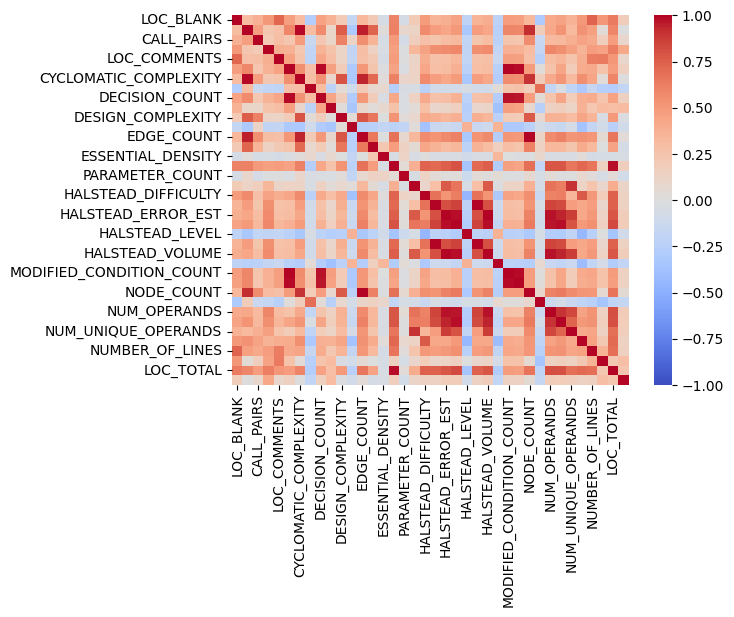

In [ ]:
corr = pc4.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

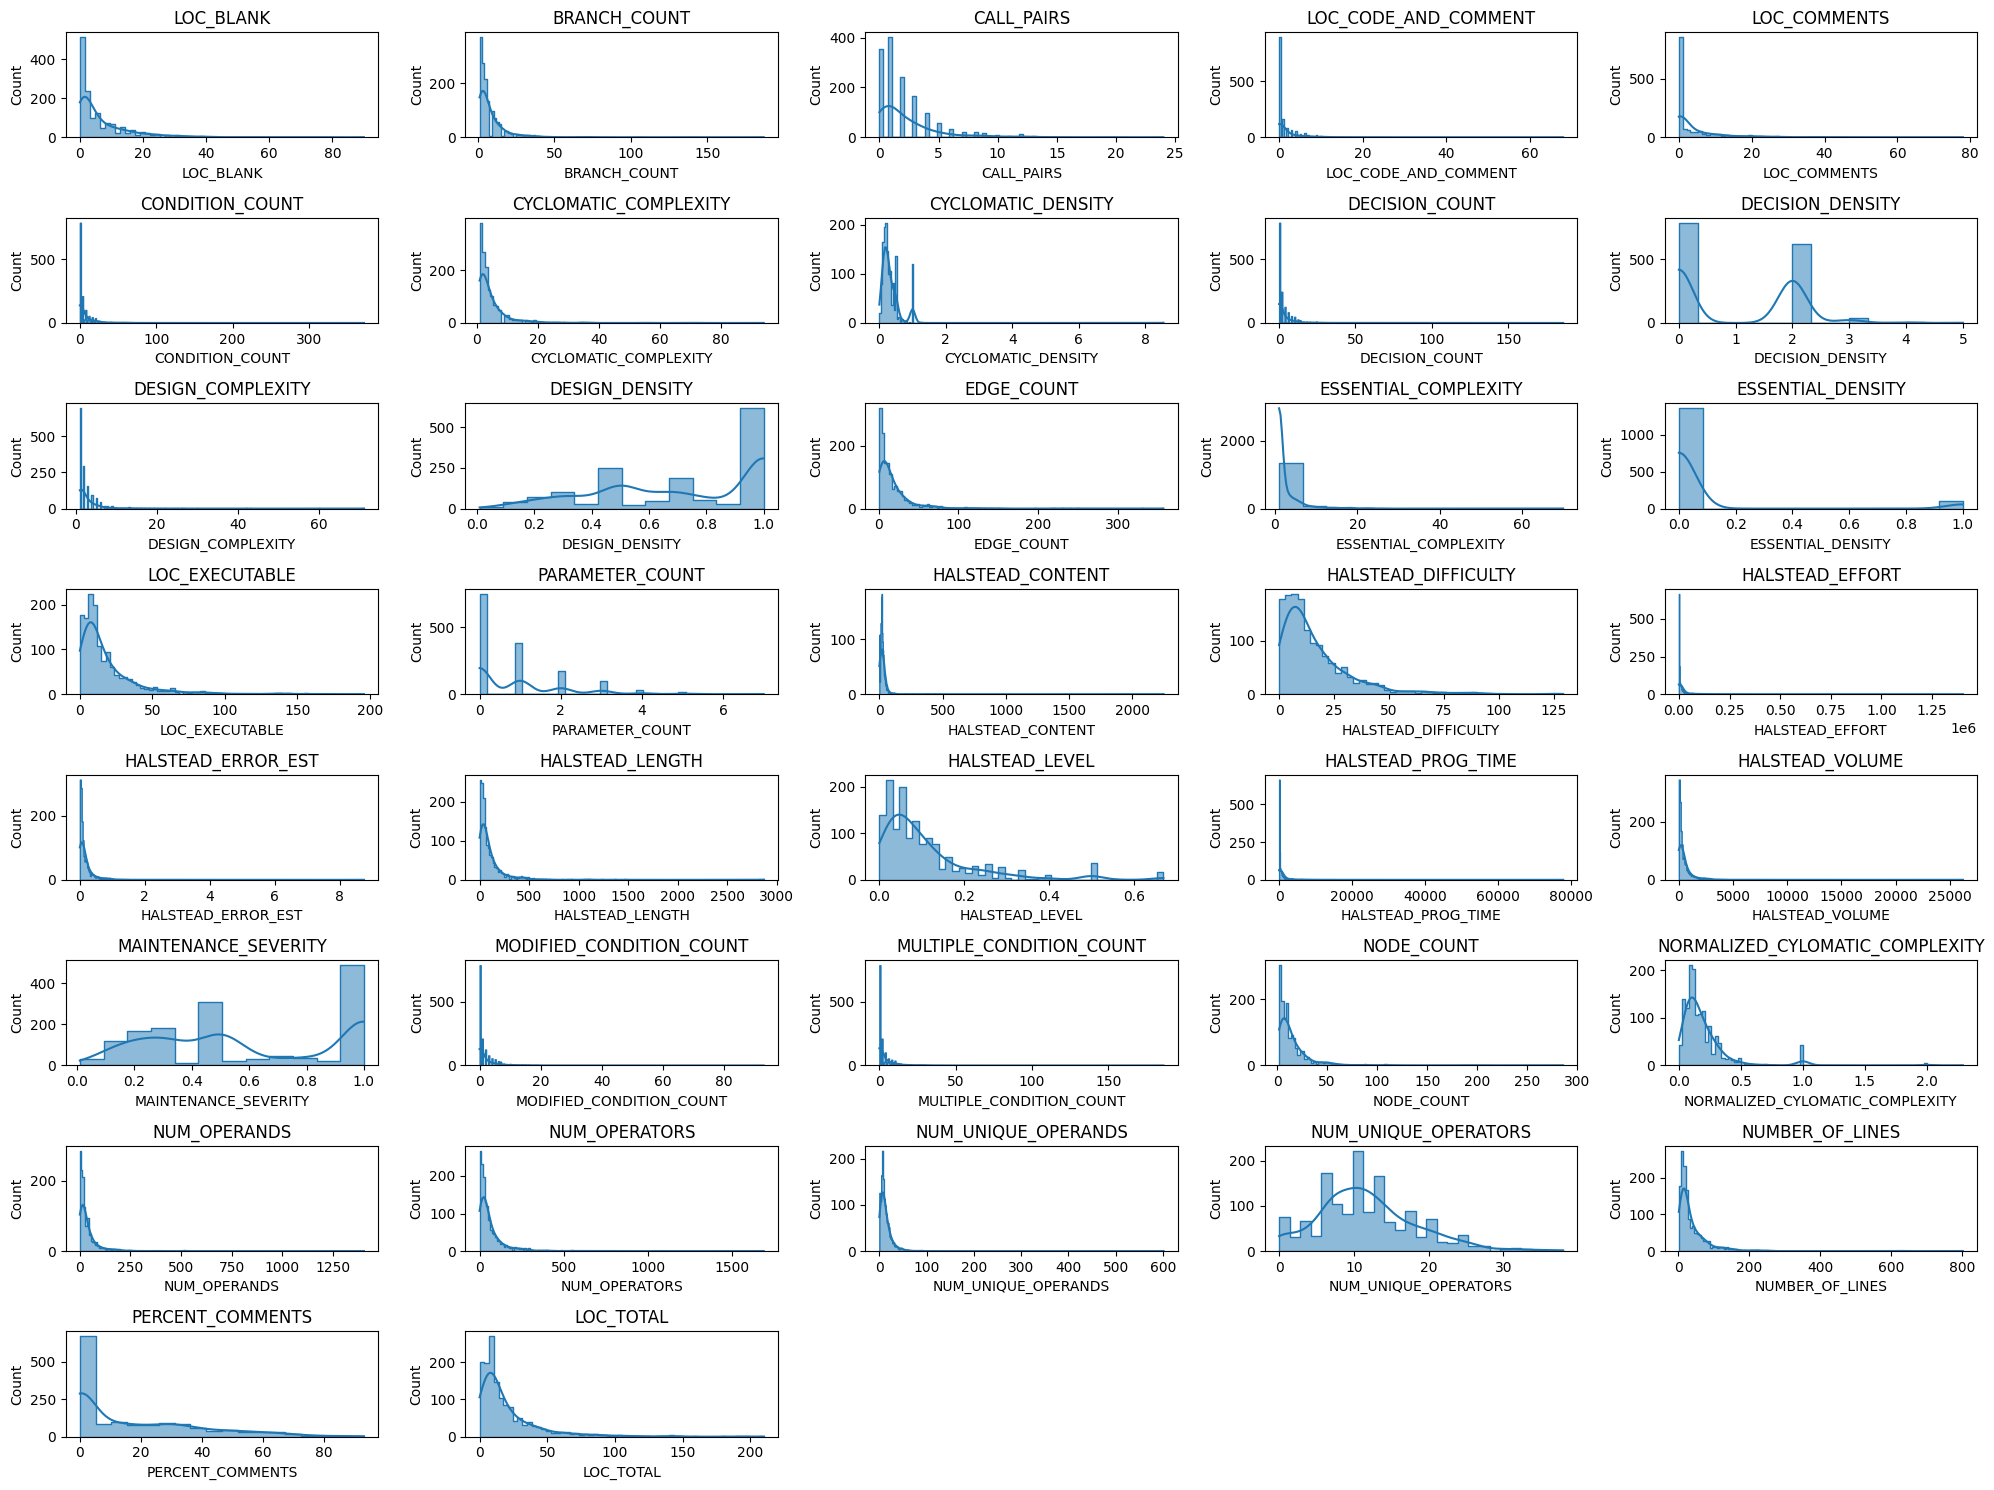

In [ ]:
# Select numerical data
numerical_data = pc4.select_dtypes(include=['float64', 'int64'])

# Plot histograms for the numerical columns to inspect their distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(8, 5, i)
    sns.histplot(numerical_data[column], kde=True, element='step')
    plt.title(column)

# Display
plt.tight_layout()
plt.show()

Numerical variables are distributed over different range, thus standardization is needed.

### Data Preprocessing

In [ ]:
# Identify features and labels
X = pc4.drop('class', axis=1)
y = pc4['class']

# Split the data
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

### Model Building & Evaluation

#### Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
lr_report = classification_report(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
log_loss_lr = log_loss(y_test, y_pred_proba_lr)

# Results
print('Logistics Regression Evaluation\n')
print(lr_report)
print(f'Accuracy: {accuracy_lr}\nLog Loss: {log_loss_lr}')

Logistics Regression Evaluation

              precision    recall  f1-score   support

       False       0.90      0.98      0.94       250
        True       0.79      0.36      0.49        42

    accuracy                           0.89       292
   macro avg       0.85      0.67      0.72       292
weighted avg       0.89      0.89      0.88       292

Accuracy: 0.8938356164383562
Log Loss: 0.29352132473538706


#### K-Nearest Neighbors

In [ ]:
# KNN
knn = KNeighborsClassifier()

# Find best n_neighbors by cross-validation
k_grid = {'n_neighbors': range(1, 30),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan']
          }
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_cv = GridSearchCV(knn, k_grid, cv=kf)

# Train model
knn_cv.fit(X_train, y_train)
knn_model = knn_cv.best_estimator_ # best KNN model

# Prediction
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluation
knn_report = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
log_loss_knn = log_loss(y_test, y_pred_proba_knn)

# Results
print('K-Nearest Neighbors Evaluation\n')
print(knn_report)
print(f'Accuracy: {accuracy_knn}\nLog Loss: {log_loss_knn}')

K-Nearest Neighbors Evaluation

              precision    recall  f1-score   support

       False       0.89      1.00      0.94       250
        True       1.00      0.29      0.44        42

    accuracy                           0.90       292
   macro avg       0.95      0.64      0.69       292
weighted avg       0.91      0.90      0.87       292

Accuracy: 0.8972602739726028
Log Loss: 0.3598004170327388


#### Support Vector Machine

In [ ]:
# Support Vector Machine
svm_model = SVC(probability = True, random_state = 42)
svm_model.fit(X_train, y_train)

# Prediction
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
svm_report = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, y_pred_proba_svm)

# Results
print('Support Vector Machine Evaluation\n')
print(svm_report)
print(f'Accuracy: {accuracy_svm}\nLog Loss: {log_loss_svm}')

Support Vector Machine Evaluation

              precision    recall  f1-score   support

       False       0.88      1.00      0.94       250
        True       1.00      0.19      0.32        42

    accuracy                           0.88       292
   macro avg       0.94      0.60      0.63       292
weighted avg       0.90      0.88      0.85       292

Accuracy: 0.8835616438356164
Log Loss: 0.26424494688693756


#### Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
dt_report = classification_report(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
log_loss_dt = log_loss(y_test, y_pred_proba_dt)

# Results
print('Decision Tree Evaluation\n')
print(dt_report)
print(f'Accuracy: {accuracy_dt}\nLog Loss: {log_loss_dt}')

Decision Tree Evaluation

              precision    recall  f1-score   support

       False       0.88      1.00      0.94       250
        True       0.90      0.21      0.35        42

    accuracy                           0.88       292
   macro avg       0.89      0.61      0.64       292
weighted avg       0.89      0.88      0.85       292

Accuracy: 0.8835616438356164
Log Loss: 0.3822679335954711


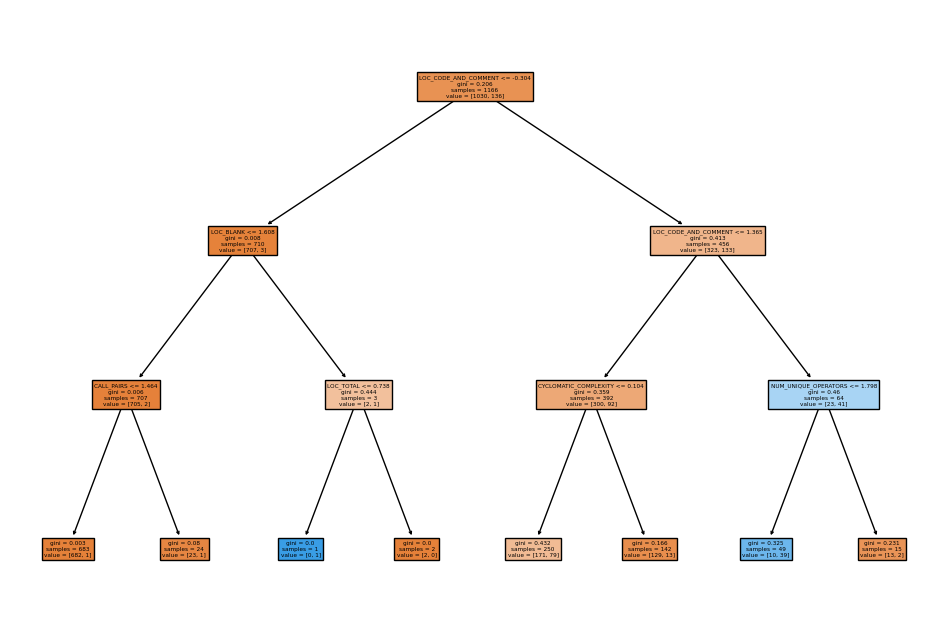

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names = X.columns.tolist())
plt.show()

#### Random Forest

In [ ]:
# Random Forest
# Find best model through cross validation
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

rf_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
           'max_features': ['auto', 'sqrt'],
           'max_depth': max_depth,
           'min_samples_split': randint(2,20),
           'min_samples_leaf': randint(1,10),
           'bootstrap': [True, False]}

rf_cv = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 42),
                           param_distributions = rf_grid,
                           n_iter = 100, cv = 3, verbose = 2, n_jobs = -1)

# Train model
rf_cv.fit(X_train, y_train)
rf_model = rf_cv.best_estimator_ # best random forest model

# Prediction
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_report = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, y_pred_proba_rf)

# Results
print('Random Forest Evaluation\n')
print(rf_report)
print(f'Accuracy: {accuracy_rf}\nLog Loss: {log_loss_rf}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random Forest Evaluation

              precision    recall  f1-score   support

       False       0.90      1.00      0.94       250
        True       0.93      0.33      0.49        42

    accuracy                           0.90       292
   macro avg       0.92      0.66      0.72       292
weighted avg       0.90      0.90      0.88       292

Accuracy: 0.9006849315068494
Log Loss: 0.20111533648842767


#### AdaBoost

In [ ]:
# AdaBoost
ab_model = AdaBoostClassifier(random_state = 42)
ab_model.fit(X_train, y_train)

# Prediction
y_pred_ab = ab_model.predict(X_test)
y_pred_proba_ab = ab_model.predict_proba(X_test)[:, 1]

# Evaluation
ab_report = classification_report(y_test, y_pred_ab)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
log_loss_ab = log_loss(y_test, y_pred_proba_ab)

# Results
print('AdaBoost Evaluation\n')
print(ab_report)
print(f'Accuracy: {accuracy_ab}\nLog Loss: {log_loss_ab}')

AdaBoost Evaluation

              precision    recall  f1-score   support

       False       0.91      0.96      0.93       250
        True       0.65      0.40      0.50        42

    accuracy                           0.88       292
   macro avg       0.78      0.68      0.72       292
weighted avg       0.87      0.88      0.87       292

Accuracy: 0.8835616438356164
Log Loss: 0.621299194932036


#### XGBoost

In [ ]:
# XGBoost
xgb_grid = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.29),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.5, 1),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.4),
    'reg_alpha': uniform(0, 40),
    'reg_lambda': uniform(0, 1)
}

xgb_cv = RandomizedSearchCV(
    XGBClassifier(objective='binary:logistic'), # binary classification
    param_distributions = xgb_grid,
    n_iter = 100,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5,
    verbose = 3,
    random_state = 42
)

# Train model
xgb_cv.fit(X_train, y_train)
xgb_model = xgb_cv.best_estimator_ # best XGBoost model

# Prediction
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
xgb_report = classification_report(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
log_loss_xgb = log_loss(y_test, y_pred_proba_xgb)

# Results
print('XGBoost Evaluation\n')
print(xgb_report)
print(f'Accuracy: {accuracy_xgb}\nLog Loss: {log_loss_xgb}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGBoost Evaluation

              precision    recall  f1-score   support

       False       0.91      0.97      0.94       250
        True       0.69      0.43      0.53        42

    accuracy                           0.89       292
   macro avg       0.80      0.70      0.73       292
weighted avg       0.88      0.89      0.88       292

Accuracy: 0.8904109589041096
Log Loss: 0.24119367079404588


#### Neural Network

In [ ]:
# Neural Network
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Build model
neural_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]), # add layers
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
neural_model.compile(loss='binary_crossentropy', # for binary classification
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history_neural = neural_model.fit(X_train, y_train, epochs = 25,
                                  batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/25
30/30 [==============================] - 1s 11ms/step - loss: 0.4310 - accuracy: 0.8466 - val_loss: 0.2903 - val_accuracy: 0.9017
Epoch 2/25
30/30 [==============================] - 0s 5ms/step - loss: 0.2841 - accuracy: 0.8884 - val_loss: 0.2693 - val_accuracy: 0.9231
Epoch 3/25
30/30 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.9024 - val_loss: 0.2452 - val_accuracy: 0.9231
Epoch 4/25
30/30 [==============================] - 0s 4ms/step - loss: 0.2331 - accuracy: 0.9120 - val_loss: 0.2394 - val_accuracy: 0.9231
Epoch 5/25
30/30 [==============================] - 0s 5ms/step - loss: 0.2165 - accuracy: 0.9227 - val_loss: 0.2411 - val_accuracy: 0.9231
Epoch 6/25
30/30 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.9281 - val_loss: 0.2298 - val_accuracy: 0.9274
Epoch 7/25
30/30 [==============================] - 0s 4ms/step - loss: 0.1948 - accuracy: 0.9270 - val_loss: 0.2318 - val_accuracy: 0.9231
Epoch 8/25
30/30 [=

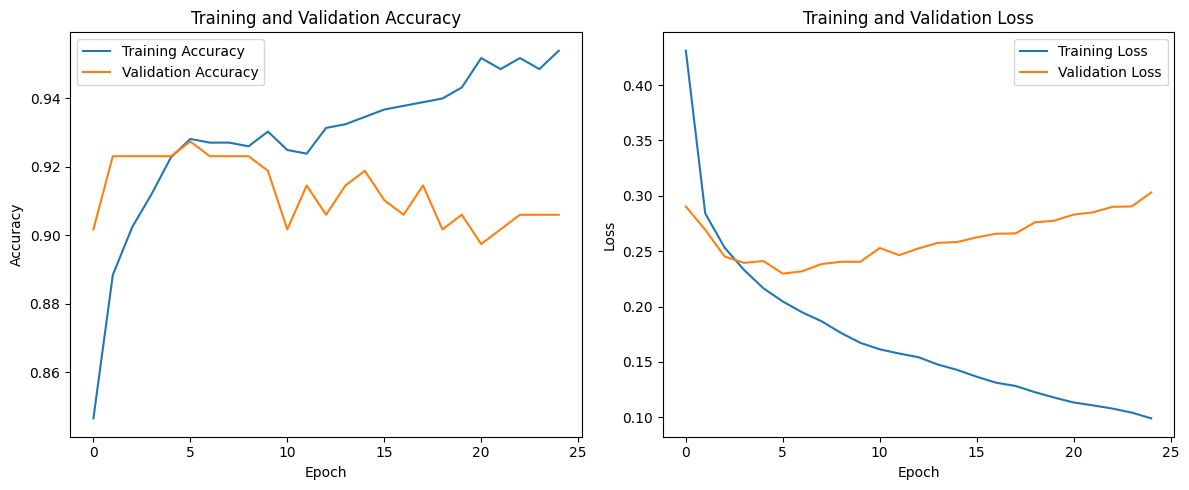

In [ ]:
# Traning Accuracy and Loss Visualization
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_neural.history['accuracy'], label='Training Accuracy')
plt.plot(history_neural.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_neural.history['loss'], label='Training Loss')
plt.plot(history_neural.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Prediction
y_pred_proba_neural = neural_model.predict(X_test).flatten()
y_pred_neural = (y_pred_proba_neural > 0.5).astype(int)

# Evaluation
neural_report = classification_report(y_test, y_pred_neural)
log_loss_neural = log_loss(y_test, y_pred_proba_neural)
accuracy_neural = accuracy_score(y_test, y_pred_neural)

# Results
print('Neural Network Evaluation\n')
print(neural_report)
print(f'Accuracy: {accuracy_neural}\nLog Loss: {log_loss_neural}')

10/10 [==============================] - 0s 2ms/step
Neural Network Evaluation

              precision    recall  f1-score   support

       False       0.92      0.98      0.95       250
        True       0.81      0.50      0.62        42

    accuracy                           0.91       292
   macro avg       0.86      0.74      0.78       292
weighted avg       0.90      0.91      0.90       292

Accuracy: 0.910958904109589
Log Loss: 0.2598348706699942


### Model Selection

#### ROC Curve

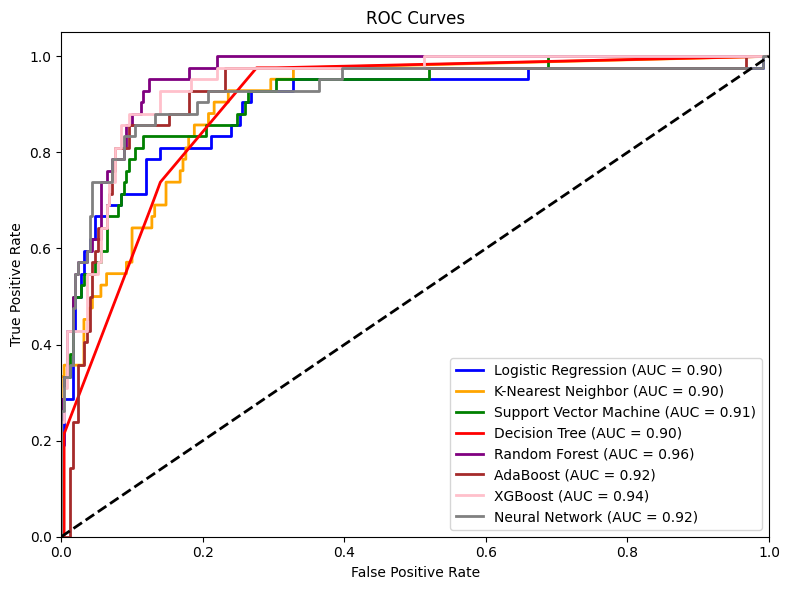

In [ ]:
# Setup plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
model_predictions = [
    (y_pred_proba_lr, 'Logistic Regression'),
    (y_pred_proba_knn, 'K-Nearest Neighbor'),
    (y_pred_proba_svm, 'Support Vector Machine'),
    (y_pred_proba_dt, 'Decision Tree'),
    (y_pred_proba_rf, 'Random Forest'),
    (y_pred_proba_ab, 'AdaBoost'),
    (y_pred_proba_xgb, 'XGBoost'),
    (y_pred_proba_neural, 'Neural Network')
]

# Plot ROC curve for each model
for model_proba, title in model_predictions:
    fpr, tpr, _ = roc_curve(y_test, model_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=next(colors), lw=2, label=f'{title} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

#### Performance Metrics

In [ ]:
# Model names
model = ['Logistic Regression', 'K-Nearest Neighbor', 'Support Vector Machine',
         'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Neural Network']

# Performance metrics
performance = {
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_knn),
        roc_auc_score(y_test, y_pred_proba_svm),
        roc_auc_score(y_test, y_pred_proba_dt),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_ab),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_neural)
    ],
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_dt,
                 accuracy_rf, accuracy_ab, accuracy_xgb, accuracy_neural],
    'Log Loss': [log_loss_lr, log_loss_knn, log_loss_svm, log_loss_dt,
                 log_loss_rf, log_loss_ab, log_loss_xgb, log_loss_neural],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_ab),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_neural)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_ab),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_neural)
    ],
    'F1 Score (macro)': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
        f1_score(y_test, y_pred_dt, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_ab, average='macro'),
        f1_score(y_test, y_pred_xgb, average='macro'),
        f1_score(y_test, y_pred_neural, average='macro')
    ],
    'F1 Score (micro)': [
        f1_score(y_test, y_pred_lr, average='micro'),
        f1_score(y_test, y_pred_knn, average='micro'),
        f1_score(y_test, y_pred_svm, average='micro'),
        f1_score(y_test, y_pred_dt, average='micro'),
        f1_score(y_test, y_pred_rf, average='micro'),
        f1_score(y_test, y_pred_ab, average='micro'),
        f1_score(y_test, y_pred_xgb, average='micro'),
        f1_score(y_test, y_pred_neural, average='micro')
    ],
    'F1 Score (weighted)': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_ab, average='weighted'),
        f1_score(y_test, y_pred_xgb, average='weighted'),
        f1_score(y_test, y_pred_neural, average='weighted')
    ]
}

performance_df = pd.DataFrame(performance, index=model).sort_values(by=['ROC AUC'], ascending=False)
print(performance_df)

                         ROC AUC  Accuracy  Log Loss  Precision    Recall  \
Random Forest           0.957810  0.900685  0.201115   0.933333  0.333333   
XGBoost                 0.942762  0.890411  0.241194   0.692308  0.428571   
Neural Network          0.924190  0.910959  0.259835   0.807692  0.500000   
AdaBoost                0.919333  0.883562  0.621299   0.653846  0.404762   
Support Vector Machine  0.913905  0.883562  0.264245   1.000000  0.190476   
K-Nearest Neighbor      0.901857  0.897260  0.359800   1.000000  0.285714   
Logistic Regression     0.898000  0.893836  0.293521   0.789474  0.357143   
Decision Tree           0.896333  0.883562  0.382268   0.900000  0.214286   

                        F1 Score (macro)  F1 Score (micro)  \
Random Forest                   0.718100          0.900685   
XGBoost                         0.733698          0.890411   
Neural Network                  0.783630          0.910959   
AdaBoost                        0.717054          0.883562

We choose **Random Forest** as our best model based on the performance metrics.

### Feature Evaluation

In [ ]:
# Convert X_train, X_test to dataframe for LIME and SHAP
X_train_df = pd.DataFrame(X_train, columns=pc4.drop('class', axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=pc4.drop('class', axis=1).columns)

#### LIME

In [ ]:
# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train_df.values,
    feature_names = X_train_df.columns.tolist(),
    mode = 'classification'
)

# LIME Explaination (show only one case as an example due to too many features)
explanation = lime_explainer.explain_instance(X_test_df.values[88], rf_model.predict_proba, num_features=len(X_train_df.columns))
explanation.show_in_notebook(show_table=True, show_all=False)

In [ ]:
n = X_test_df.shape[0] # sample size
feature_score_lime = {feature: 0 for feature in X_train_df.columns}

for i in range(n):
  explanation = lime_explainer.explain_instance(X_test_df.values[i], rf_model.predict_proba, num_features=len(X_train_df.columns))
  exp_list = explanation.as_list()

  for tup in exp_list:
    feature, score = tup[0], tup[1]

    # Get total influential score for each feature
    for key, value in feature_score_lime.items():
      if key in feature:
        feature_score_lime[key] += abs(score)

# Get average influential value
for key, value in feature_score_lime.items():
  feature_score_lime[key] /= n

# Sort the dictionary by values
sorted_feature_lime = sorted(feature_score_lime.items(), key=lambda x: x[1])

# Create a DataFrame to display the result
df_feature_lime = pd.DataFrame(sorted_feature_lime, columns=['Feature', 'Score'])
df_feature_lime.head()

,Feature,Score
0,DECISION_COUNT,0.002077
1,PARAMETER_COUNT,0.002143
2,MODIFIED_CONDITION_COUNT,0.002502
3,MULTIPLE_CONDITION_COUNT,0.002831
4,ESSENTIAL_DENSITY,0.002894


#### SHAP

In [ ]:
# Initialize Explainer
shap_explainer = shap.TreeExplainer(rf_model, X_train)

# Compute SHAP values for the test set
shap_values = shap_explainer.shap_values(X_test, check_additivity = False)

# Randomly select 3 instance for showing
indices = np.random.choice(X_test_df.shape[0], size=3, replace=False)

for i in indices:
    shap.initjs()
    print(f"Index: {i}")

    for class_index in range(shap_values.shape[2]):  # Loop through each class
        explainer_value = shap_explainer.expected_value[class_index]
        shap_values_class = shap_values[i, :, class_index]

        # Display the SHAP force plot for each class for the selected instance
        print(f"Class Index: {class_index}")
        plot = shap.force_plot(explainer_value, shap_values_class, X_test_df.iloc[i, :], link="logit", show = False)
        display(plot)

100%|===================| 583/584 [03:12<00:00]       

Index: 218
Class Index: 0


Class Index: 1


Index: 214
Class Index: 0


Class Index: 1


Index: 225
Class Index: 0


Class Index: 1


**General Interpretation**\
f(x): The base value, which indicates the average model output (probability) over the training set for certain class.\
Red arrows: Indicate feature values that push the prediction higher than the base value for a given class.\
Blue arrows: Indicate feature values that pull the prediction lower than the base value for that class.\
Length of arrows: Represents the magnitude of the feature's contribution to the prediction.\
Position of the feature label: Indicates the actual value of that feature for the instance being explained.\
The output value for the prediction is the final position on the x-axis after all the feature contributions have been taken into account. If it is greater than the base value, the model predicts that this instance is more likely to be in that class; if it is less, it predicts it is less likely to be in the class.

In [ ]:
# find the average impact of each feature
shap_values_array = np.stack(shap_values, axis=1)

# Compute the mean of the absolute SHAP values for each feature
mean_abs_shap_values = np.abs(shap_values_array).mean(axis=0)
if mean_abs_shap_values.ndim > 1:
    mean_abs_shap_values = mean_abs_shap_values.mean(axis=1)

# Create a dictionary for feature scores
feature_score_shap = {feature: mean_abs_shap_values[idx] for idx, feature in enumerate(X_train_df.columns)}
sorted_feature_shap = sorted(feature_score_shap.items(), key=lambda x: x[1])

# Create a DataFrame to display the result
df_feature_shap = pd.DataFrame(sorted_feature_shap, columns=['Feature', 'Score'])
df_feature_shap.head()

,Feature,Score
0,LOC_BLANK,0.003649
1,NUM_UNIQUE_OPERANDS,0.003961
2,NUM_OPERATORS,0.004090
3,HALSTEAD_ERROR_EST,0.004117
4,CALL_PAIRS,0.004118


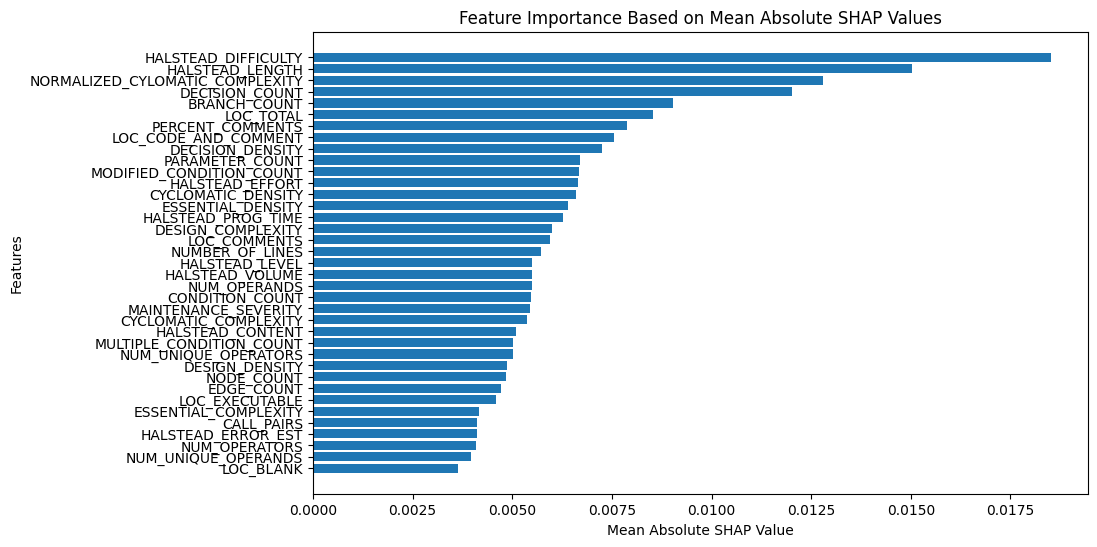

In [ ]:
if mean_abs_shap_values.ndim > 1:
    mean_abs_shap_values = mean_abs_shap_values.mean(axis=1)

# Sort the feature importances by their mean absolute SHAP values
feature_score_shap = {feature: mean_abs_shap_values[idx] for idx, feature in enumerate(X_train_df.columns)}
sorted_feature_importances = sorted(feature_score_shap.items(), key=lambda x: x[1], reverse=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), [score for feature, score in sorted_feature_importances], tick_label=[feature for feature, score in sorted_feature_importances])
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Features')
plt.title('Feature Importance Based on Mean Absolute SHAP Values')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

### Model Optimization

#### After LIME

In [ ]:
# Drop non-influential features
drop_features_lime = ['DECISION_COUNT', 'PARAMETER_COUNT', 'MODIFIED_CONDITION_COUNT']
X_train_lime = X_train_df.drop(columns = drop_features_lime)
X_test_lime = X_test_df.drop(columns = drop_features_lime)

# Retrain Random Forest Model
# Extract the best parameters from the previous fitting
best_params_rf = rf_cv.best_params_
lime_model = RandomForestClassifier(**best_params_rf, random_state=42)
lime_model.fit(X_train_lime, y_train)

# Prediction
y_pred_lime = lime_model.predict(X_test_lime)
y_pred_proba_lime = lime_model.predict_proba(X_test_lime)[:, 1]

# Evaluation
lime_report = classification_report(y_test, y_pred_lime)
accuracy_lime = accuracy_score(y_test, y_pred_lime)
log_loss_lime = log_loss(y_test, y_pred_proba_lime)

# Results
print('Random Forest Evaluation (LIME)\n')
print(lime_report)
print(f'Accuracy: {accuracy_lime}\nLog Loss: {log_loss_lime}')

Random Forest Evaluation (LIME)

              precision    recall  f1-score   support

       False       0.90      1.00      0.95       250
        True       1.00      0.31      0.47        42

    accuracy                           0.90       292
   macro avg       0.95      0.65      0.71       292
weighted avg       0.91      0.90      0.88       292

Accuracy: 0.9006849315068494
Log Loss: 0.21591388215463542


#### After SHAP

In [ ]:
# Drop the identified non-influential features from the training and test sets
drop_features_shap = ['LOC_BLANK', 'NUM_UNIQUE_OPERANDS', 'NUM_OPERATORS']
X_train_shap = X_train_df.drop(columns=drop_features_shap)
X_test_shap = X_test_df.drop(columns=drop_features_shap)

# Retrain Random Forest Model
shap_model = RandomForestClassifier(**best_params_rf, random_state=42)
shap_model.fit(X_train_shap, y_train)

# Make predictions with the updated model on the reduced feature test set
y_pred_shap = shap_model.predict(X_test_shap)
y_pred_proba_shap = shap_model.predict_proba(X_test_shap)[:, 1]

# Evaluation
shap_report = classification_report(y_test, y_pred_shap)
accuracy_shap = accuracy_score(y_test, y_pred_shap)
log_loss_shap = log_loss(y_test, y_pred_proba_shap)

# Print results
print('Random Forest Evaluation (SHAP-Informed Model)\n')
print(shap_report)
print(f'Accuracy: {accuracy_shap}\nLog Loss: {log_loss_shap}')

Random Forest Evaluation (SHAP-Informed Model)

              precision    recall  f1-score   support

       False       0.89      1.00      0.94       250
        True       1.00      0.26      0.42        42

    accuracy                           0.89       292
   macro avg       0.94      0.63      0.68       292
weighted avg       0.91      0.89      0.87       292

Accuracy: 0.8938356164383562
Log Loss: 0.21990639479949778


### Comparison

#### ROC Curve

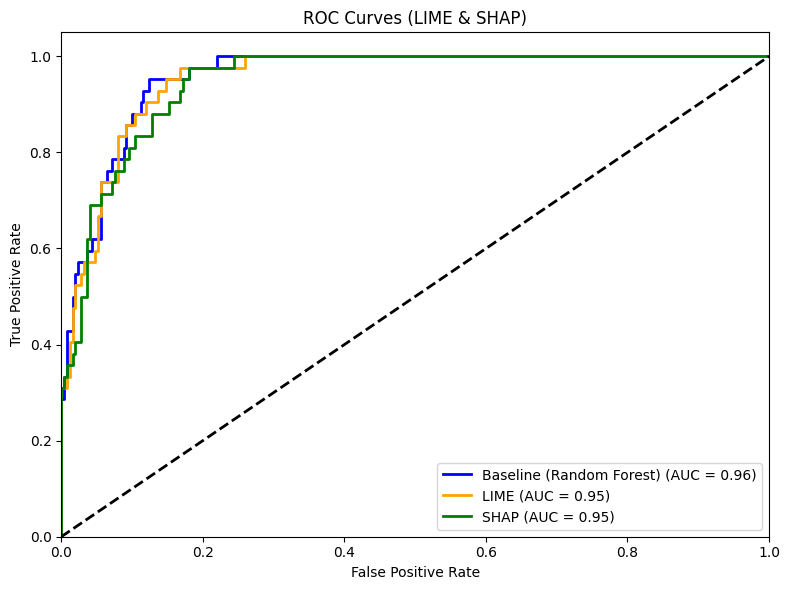

In [ ]:
# Setup plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['blue', 'orange', 'green'])
eml_predictions = [
    (y_pred_proba_rf, 'Baseline (Random Forest)'),
    (y_pred_proba_lime, 'LIME'),
    (y_pred_proba_shap, 'SHAP')
]

# Plot ROC curve for each model
for model_proba, title in eml_predictions:
    fpr, tpr, _ = roc_curve(y_test, model_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=next(colors), lw=2, label=f'{title} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves (LIME & SHAP)')
ax.legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

#### Performance Metrics

In [ ]:
# Index
eml_index = ['Baseline (Random Forest)', 'LIME', 'SHAP']

# Performance metrics
performance_eml = {
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_lime),
        roc_auc_score(y_test, y_pred_proba_shap)
    ],
    'Accuracy': [accuracy_rf, accuracy_lime, accuracy_shap],
    'Log Loss': [log_loss_rf, log_loss_lime, log_loss_shap],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_lime),
        precision_score(y_test, y_pred_shap)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_lime),
        recall_score(y_test, y_pred_shap)
    ],
    'F1 Score (macro)': [
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_lime, average='macro'),
        f1_score(y_test, y_pred_shap, average='macro')
    ],
    'F1 Score (micro)': [
        f1_score(y_test, y_pred_rf, average='micro'),
        f1_score(y_test, y_pred_lime, average='micro'),
        f1_score(y_test, y_pred_shap, average='micro')
    ],
    'F1 Score (weighted)': [
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_lime, average='weighted'),
        f1_score(y_test, y_pred_shap, average='weighted')
    ]
}

eml_compare = pd.DataFrame(performance_eml, index=eml_index).sort_values(by=['ROC AUC'], ascending=False)
print(eml_compare)

                           ROC AUC  Accuracy  Log Loss  Precision    Recall  \
Baseline (Random Forest)  0.957810  0.900685  0.201115   0.933333  0.333333   
LIME                      0.954476  0.900685  0.215914   1.000000  0.309524   
SHAP                      0.949429  0.893836  0.219906   1.000000  0.261905   

                          F1 Score (macro)  F1 Score (micro)  \
Baseline (Random Forest)          0.718100          0.900685   
LIME                              0.708953          0.900685   
SHAP                              0.678357          0.893836   

                          F1 Score (weighted)  
Baseline (Random Forest)             0.879707  
LIME                                 0.877224  
SHAP                                 0.865887  


### Summary Plot

PermutationExplainer explainer: 293it [30:34,  6.28s/it]


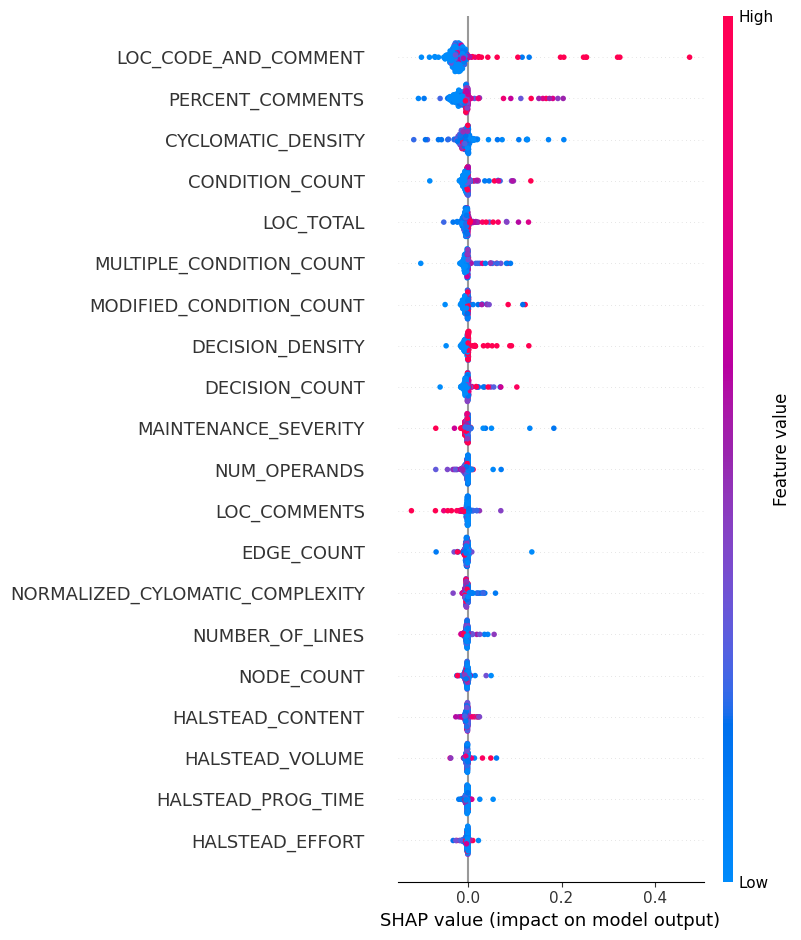

In [ ]:
# Summary Plot for SHAP
class SHAPModelEvaluator:
    def __init__(self, model, X_train, X_test, y_train, drop_features):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.drop_features = drop_features

    def generate_summary_plot(self):
        # Reduce the feature set based on SHAP feature importance
        X_train_shap = self.X_train.drop(columns=self.drop_features)
        X_test_shap = self.X_test.drop(columns=self.drop_features)

        # Fit the model on the reduced feature set
        self.model.fit(X_train_shap, self.y_train)

        # Create a SHAP explainer
        explainer = shap.Explainer(self.model.predict, X_train_shap)

        # Calculate SHAP values for the test set
        shap_values = explainer(X_test_shap)

        # Generate summary plot
        shap.summary_plot(shap_values, X_test_shap)


evaluator = SHAPModelEvaluator(shap_model, X_train_df, X_test_df, y_train, drop_features_shap)

# Generate and display the summary plot
evaluator.generate_summary_plot()